In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Primera red

Found 900 images belonging to 3 classes.
Found 894 images belonging to 3 classes.
Epoch 1/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 654ms/step - accuracy: 0.3264 - loss: 1.1061 - val_accuracy: 0.3289 - val_loss: 1.0963
Epoch 2/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 503ms/step - accuracy: 0.3731 - loss: 1.0953 - val_accuracy: 0.3859 - val_loss: 1.0972
Epoch 3/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 507ms/step - accuracy: 0.3666 - loss: 1.0955 - val_accuracy: 0.5324 - val_loss: 1.0952
Epoch 4/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 643ms/step - accuracy: 0.3808 - loss: 1.0945 - val_accuracy: 0.5168 - val_loss: 1.0936
Epoch 5/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 488ms/step - accuracy: 0.3870 - loss: 1.0987 - val_accuracy: 0.4787 - val_loss: 1.0902
Epoch 6/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 472ms/step - accuracy: 0.3925 - loss: 1.0885 - val_accuracy: 0.6074 - val_loss: 1.0693
Epoch 7/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 471ms/step - accuracy: 0.4251 - loss: 1.0741 - val_accuracy: 0.6913 - val_loss: 1.0712
Epoch 8/70
29/2

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.10      0.15       300
           1       0.34      0.42      0.38       300
           2       0.34      0.49      0.40       294

    accuracy                           0.34       894
   macro avg       0.34      0.34      0.31       894
weighted avg       0.34      0.34      0.31       894


Confusion Matrix:

[[ 30 133 137]
 [ 28 127 145]
 [ 32 117 145]]


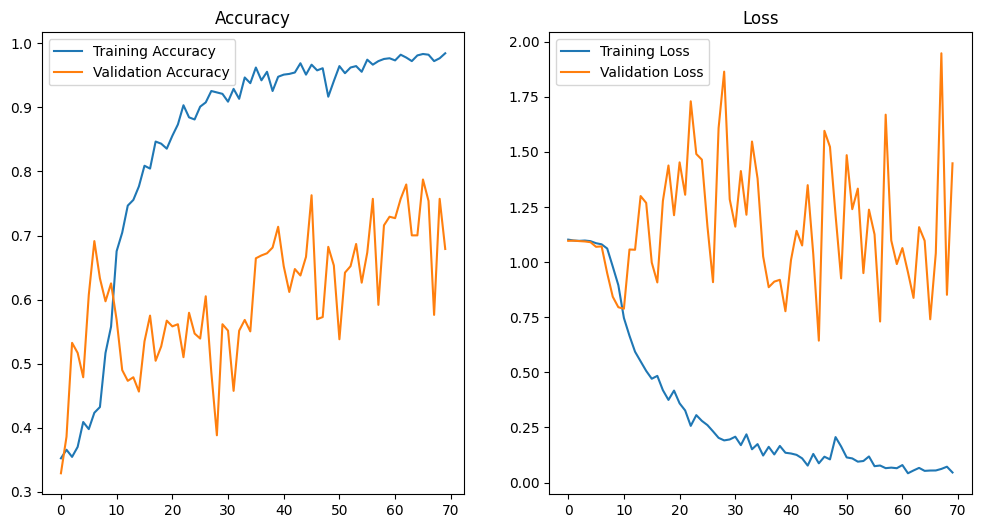

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import json

# Aumentación de datos
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Carga de datos
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/Hands/Entrenamiento',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/Hands/Validacion',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Arquitectura del modelo
model = tf.keras.Sequential([
    # Bloque 1
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Bloque 2
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Bloque 3
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

    # Capa Flatten y densas
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Salida
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Entrenamiento
history = model.fit(
    training_set,
    epochs=70,
    validation_data=test_set,
)

# Guardar el modelo y el historial
model.save('mymodel.keras')
model.save('mymodel.h5')
with open('training_history.json', 'w') as f:
    json.dump(history.history, f)

# Evaluación y métricas
predictions = np.argmax(model.predict(test_set), axis=-1)
true_labels = test_set.classes

print("\nClassification Report:\n")
print(classification_report(true_labels, predictions))
print("\nConfusion Matrix:\n")
print(confusion_matrix(true_labels, predictions))

# Visualización de métricas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


## Segunda red


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
img_size = (150, 150)
batch_size = 32

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [7]:
# Se crean los sets de entrenamiento y test
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Hands/Entrenamiento',
                                                 target_size=img_size,
                                                 batch_size=batch_size,
                                                 class_mode='categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Hands/Validacion',
                                            target_size=img_size,
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 900 images belonging to 3 classes.
Found 900 images belonging to 3 classes.


In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(training_set, epochs=70, validation_data=test_set)

Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 671s 21s/step - accuracy: 0.5305 - loss: 1.3683 - val_accuracy: 0.6611 - val_loss: 1.0286
Epoch 2/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 429ms/step - accuracy: 0.9237 - loss: 0.2058 - val_accuracy: 0.6344 - val_loss: 2.0761
Epoch 3/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 428ms/step - accuracy: 0.9782 - loss: 0.0609 - val_accuracy: 0.6433 - val_loss: 2.4811
Epoch 4/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 414ms/step - accuracy: 0.9956 - loss: 0.0185 - val_accuracy: 0.6333 - val_loss: 2.8584
Epoch 5/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 410ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.6611 - val_loss: 3.9756
Epoch 6/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 415ms/step - accuracy: 0.9932 - loss: 0.0149 - val_accuracy: 0.6500 - val_loss: 1.9714
Epoch 7/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 445ms/step - accuracy: 0.9936 - loss: 0.0182 - val_accuracy: 0.6656 - val_loss: 3.5120
Epoch 8/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 423ms/step - accuracy: 0.9987 - loss: 0.0117 - val_accuracy: 0.6556

In [11]:
model.save('Coffee_Classifier.keras')
model.save('Coffee_Classifier.h5')
model.save_weights('Coffee_Weights.weights.h5')

In [ ]:
import cv2
import numpy as np
import tensorflow as tf


#image_path = '/content/drive/MyDrive/Datasets/Coffes/Coffe_hard/Cafe cargado.jpg'
image_path = '/content/agua.png'


image = cv2.imread(image_path)


if image is None:
    raise FileNotFoundError(f"No se pudo cargar la imagen desde la ruta: {image_path}")


image = cv2.resize(image, (150, 150))


image = np.expand_dims(image, axis=0)


image = image / 255.0


model = tf.keras.models.load_model("Coffee_Classifier.keras")


predictions = model.predict(image)


classes = ["cargado", "medio", "ligero"]
class_index = np.argmax(predictions[0])


print(f"El modelo predice que la imagen es: {classes[class_index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
El modelo predice que la imagen es: ligero
